In [10]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [14]:
# define instruments to download
companies_dict = {
 'Amazon': 'AMZN',
 'Apple': 'AAPL',
 'Walgreen': 'WBA',
 'Northrop Grumman': 'NOC',
 'Boeing': 'BA',
 'Lockheed Martin':'LMT',
 'McDonalds': 'MCD',
 'Intel': 'INTC',
 'NextEra Energy': 'NEE',
 'IBM': 'IBM',
 'Texas Instruments': 'TXN',
 'MasterCard': 'MA',
 'Microsoft': 'MSFT',
 'General Electric': 'GE',
 'Alphabet Inc. (Class C)': 'GOOG',
 'American Express': 'AXP',
 'Pepsi': 'PEP',
 'Coca Cola': 'KO',
 'Johnson & Johnson': 'JNJ',
 'Toyota': 'TM',
 'Honda': 'HMC',
 'Amgen Inc.': 'AMGN',
 'JPMorgan Chase & Co.': 'JPM',
 'Netflix Inc.': 'NFLX',
 'UnitedHealth Group Inc.': 'UNH',
 'Visa Inc.': 'V',
 'Vulcan Materials': 'VMC',
 'Verizon Communications': 'VZ',
 'Waste Management Inc.': 'WM',  
 'Target Corp.': 'TGT',
 'Prologis': 'PLD',
 'Phillips 66': 'PSX',
 'Pioneer Natural Resources': 'PXD',
 'Progressive Corp.': 'PGR',
 'Nucor Corp.': 'NUE',
 'Norwegian Cruise Line Holdings': 'NCLH',
 '3M Company': 'MMM',
 'Medtronic plc': 'MDT',
 'Lilly (Eli) & Co.': 'LLY',
 'Masco Corp.': 'MAS',
 'Kroger Co.': 'KR'
}

companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [15]:
# df=pd.read_csv('SP500_List.csv')

# localhost:5000/volatility_score?basket=AAPL, TSLA, BA

In [16]:
# df[df['GICS Sector']=='Industrials']['Symbol']
# df[df['GICS Sector']=='Materials']['Symbol']
# df[df['GICS Sector']=='Energy']['Symbol']
# df[df['GICS Sector']=='Healthcare']['Symbol']
# df[df['GICS Sector']=='Financials']['Symbol']
# df[df['GICS Sector']=='Technology']['Symbol']
# df[df['GICS Sector']=='Utilities']['Symbol']
# df[df['GICS Sector']=='Real Estate']['Symbol']
# df[df['GICS Sector']=='Consumer Discretionary']['Symbol']
# df[df['GICS Sector']=='Consumer Staples']['Symbol']
# df[df['GICS Sector']=='Communication']['Symbol']

In [56]:
# Define which online source to use
data_source = 'yahoo'

# define start and end dates
start_date = '2016-05-20'
# start_date = '2018-05-20'
# start_date = '2011-05-20' #2 NaN's
end_date = '2021-05-20'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = web.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

print(panel_data.axes)

[DatetimeIndex(['2016-05-20', '2016-05-23', '2016-05-24', '2016-05-25',
               '2016-05-26', '2016-05-27', '2016-05-31', '2016-06-01',
               '2016-06-02', '2016-06-03',
               ...
               '2021-05-07', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None), MultiIndex([('Adj Close', 'AMZN'),
            ('Adj Close', 'AAPL'),
            ('Adj Close',  'WBA'),
            ('Adj Close',  'NOC'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'LMT'),
            ('Adj Close',  'MCD'),
            ('Adj Close', 'INTC'),
            ('Adj Close',  'NEE'),
            ('Adj Close',  'IBM'),
            ...
            (   'Volume',  'PSX'),
            (   'Volume',  'PXD'),
            (   'Volume',  'PGR'),
            (   'Volume',  'NUE'),
            (   'Volume', '

In [57]:
# Find Stock Open and Close Values
stock_close = panel_data['Close']
stock_open = panel_data['Open']


# df=panel_data.dropna()
# df=panel_data.isnull()

# print(stock_close)
print(stock_close.iloc[0])
# print(df)

Symbols
AMZN    702.799988
AAPL     23.805000
WBA      77.220001
NOC     212.720001
BA      127.389999
LMT     240.070007
MCD     122.559998
INTC     30.150000
NEE      29.832500
IBM     147.250000
TXN      58.529999
MA       95.470001
MSFT     50.619999
GE       28.423077
GOOG    709.739990
AXP      63.919998
PEP     100.099998
KO       43.950001
JNJ     112.639999
TM      100.610001
HMC      26.799999
AMGN    150.179993
JPM      63.509998
NFLX     92.489998
UNH     130.940002
V        77.669998
VMC     115.750000
VZ       49.660000
WM       60.730000
TGT      68.660004
PLD      46.840000
PSX      77.900002
PXD     164.339996
PGR      32.980000
NUE      46.529999
NCLH     47.209999
MMM     165.009995
MDT      80.519997
LLY      74.809998
MAS      31.780001
KR       34.619999
Name: 2016-05-20 00:00:00, dtype: float64


In [58]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])

for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [59]:
len(companies)

41

In [60]:
for i in range(0, len(companies)):
 print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))


Company: Apple, Change: -1088.5132446289062
Company: Amgen Inc., Change: 40.3223876953125
Company: Amazon, Change: -20.660037994384766
Company: American Express, Change: -39.25038146972656
Company: Boeing, Change: -165.82036590576172
Company: General Electric, Change: -129.96925354003906
Company: Alphabet Inc. (Class C), Change: 15.740257263183594
Company: Honda, Change: 31.25998306274414
Company: IBM, Change: 22.307512283325195
Company: Intel, Change: -13.269790649414062
Company: Johnson & Johnson, Change: 64.11001205444336
Company: JPMorgan Chase & Co., Change: -13.699485778808594
Company: Coca Cola, Change: 53.6198616027832
Company: Kroger Co., Change: -20.952690601348877
Company: Lilly (Eli) & Co., Change: 1315.6033325195312
Company: Lockheed Martin, Change: 13.350238800048828
Company: MasterCard, Change: 23.980026245117188
Company: Masco Corp., Change: -9.700016021728516
Company: McDonalds, Change: 5.56005859375
Company: Medtronic plc, Change: -43.08001708984375
Company: 3M Compan

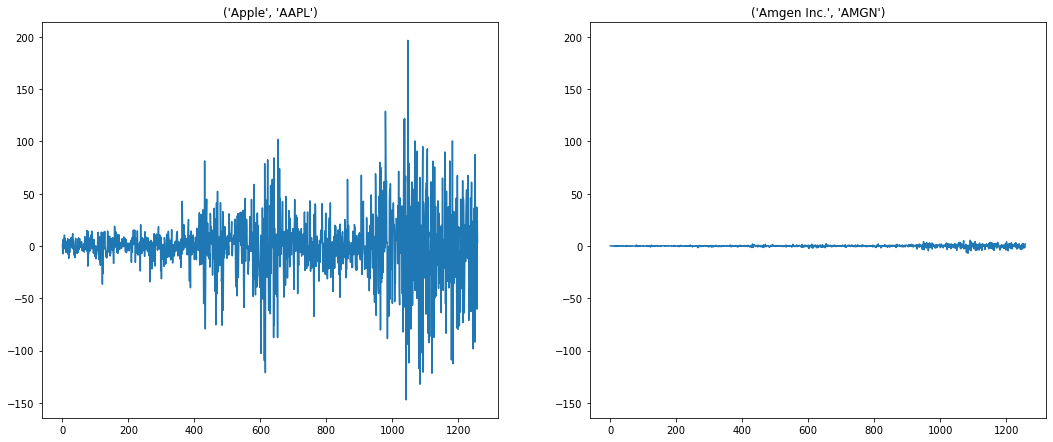

In [61]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [62]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.2486269969498803
-0.31655754123518137
-1.1091233564236563e-05


In [71]:
#Calculate average annual percentage return and volatilities over a theoretical one year period

#https://pythonforfinance.net/2018/02/08/stock-clusters-using-k-means-algorithm-in-python/


returns = companies.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = companies.pct_change().std() * sqrt(252)
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

AttributeError: 'list' object has no attribute 'change'

In [63]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [64]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=10))])

In [69]:
# To check how well the algorithm did use print(kmeans.inertia_)
#Intertia is a score of how close each cluster is, so a lower inertia score is better. 
#In this case, we get a score of 17.490
print(kmeans.inertia_)

0.17490434003337701


In [65]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                               companies
30       0                      (Phillips 66, PSX)
39       0                         (Walgreen, WBA)
8        0                              (IBM, IBM)
6        0         (Alphabet Inc. (Class C), GOOG)
23       1                   (NextEra Energy, NEE)
12       1                         (Coca Cola, KO)
10       1                (Johnson & Johnson, JNJ)
0        1                           (Apple, AAPL)
14       1                (Lilly (Eli) & Co., LLY)
1        1                      (Amgen Inc., AMGN)
7        1                            (Honda, HMC)
31       2        (Pioneer Natural Resources, PXD)
32       2                     (Target Corp., TGT)
24       3                    (Netflix Inc., NFLX)
21       3                       (Microsoft, MSFT)
38       3            (Verizon Communications, VZ)
18       3                        (McDonalds, MCD)
33       3                            (Toyota, TM)
17       4                     

In [66]:
# PCA
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                               companies
16       0                        (MasterCard, MA)
8        0                              (IBM, IBM)
25       1                 (Northrop Grumman, NOC)
7        1                            (Honda, HMC)
10       1                (Johnson & Johnson, JNJ)
11       1             (JPMorgan Chase & Co., JPM)
22       2  (Norwegian Cruise Line Holdings, NCLH)
34       2                (Texas Instruments, TXN)
31       2        (Pioneer Natural Resources, PXD)
15       2                  (Lockheed Martin, LMT)
13       2                        (Kroger Co., KR)
26       2                      (Nucor Corp., NUE)
24       3                    (Netflix Inc., NFLX)
40       3             (Waste Management Inc., WM)
6        3         (Alphabet Inc. (Class C), GOOG)
5        3                  (General Electric, GE)
3        3                 (American Express, AXP)
37       3                 (Vulcan Materials, VMC)
29       3                     

<Figure size 432x288 with 0 Axes>

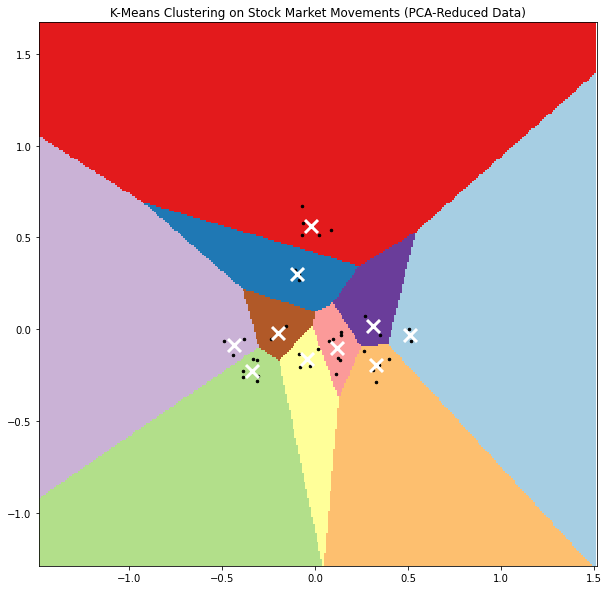

In [67]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

0.17490434003337701
